In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [2]:
import pandas as pd
data_path = 'C:\\Users\\mehedee\\Documents\\data\\course\\UDEMY_TSA_FINAL\\Data\\'
airline = pd.read_csv(data_path+'airline_passengers.csv',index_col='Month')
# index_col='Date',parse_dates=True

In [3]:
airline.dropna(inplace=True)

In [4]:
airline.index = pd.to_datetime(airline.index)

In [5]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [8]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

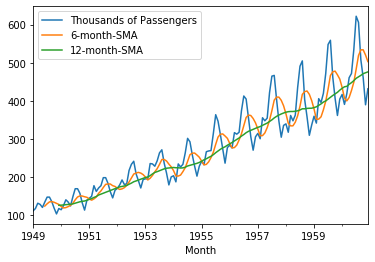

In [9]:
airline.plot()

In [10]:
# exponentially moving average model

airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()


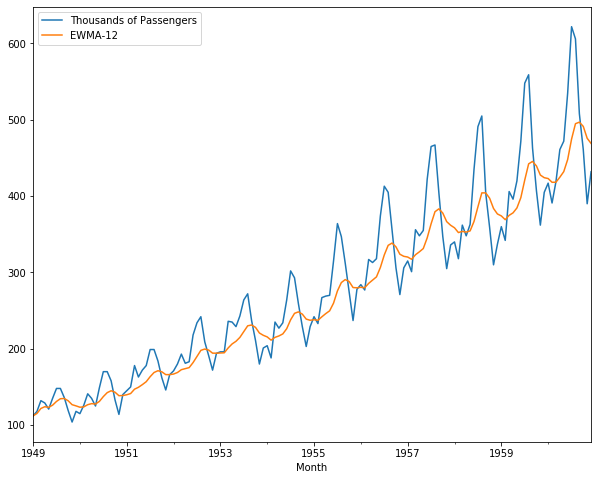

In [11]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(10,8))

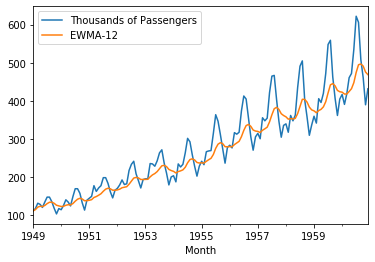

In [12]:
airline[['Thousands of Passengers','EWMA-12']].plot()

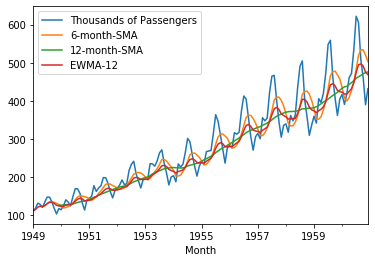

In [13]:
airline.plot()

In [14]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

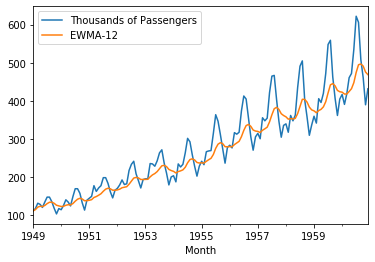

In [18]:
airline[['Thousands of Passengers','EWMA-12']].plot()

In [19]:
# EWMA (Exponentially weighted movin average)
# when adjust = False is specified ,moving averages are calculated as
# y0 = x0
# Yt = (1-alpha )Yt-1 + axt



In [20]:
#theory of holt winters 
# single exponenetial smoothing 


In [21]:
# new smoothing factor beta


In [22]:
import numpy as np
import pandas as pd


In [25]:
data_path = 'C:\\Users\\mehedee\\Documents\\data\\course\\UDEMY_TSA_FINAL\\Data\\'
df = pd.read_csv(data_path+'airline_passengers.csv',index_col='Month',parse_dates=True)
# index_col='Date',parse_dates=True

In [26]:
airline.dropna(inplace=True)

In [27]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [28]:
df.index.freq = 'MS'

In [30]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [31]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [38]:
span =12
alpha = 2/(span)

In [39]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [41]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,113.000000
1949-03-01,132,116.166667
1949-04-01,129,118.305556
1949-05-01,121,118.754630


In [42]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [46]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [47]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    113.000000
1949-04-01    116.166667
1949-05-01    118.305556
                 ...    
1960-08-01    478.822025
1960-09-01    500.018355
1960-10-01    501.348629
1960-11-01    494.623857
1960-12-01    477.186548
Freq: MS, Length: 144, dtype: float64

In [48]:
df[] = fitted_model/fittedvalues.shift(-1)

SyntaxError: invalid syntax (<ipython-input-48-5ade7eebf16b>, line 1)

In [49]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [50]:
model.fit()

C:\Users\mehedee\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [51]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [53]:
df['SES127'] = fitted_model.fittedvalues.shift(-1) 

In [54]:
df.head()

,Thousands of Passengers,EWMA12,SES127
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,113.000000,113.000000
1949-03-01,132,116.166667,116.166667
1949-04-01,129,118.305556,118.305556
1949-05-01,121,118.754630,118.754630


In [58]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [59]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [60]:
df.head()

,Thousands of Passengers,EWMA12,SES127
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,113.000000,113.000000
1949-03-01,132,116.166667,116.166667
1949-04-01,129,118.305556,118.305556
1949-05-01,121,118.754630,118.754630


In [61]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [62]:
model.fit(smoothing_level=alpha,optimized=False)

In [63]:
fitted_model  =model.fit(smoothing_level=alpha,optimized=False)

In [68]:
fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    113.000000
1949-03-01    116.166667
1949-04-01    118.305556
1949-05-01    118.754630
                 ...    
1960-08-01    500.018355
1960-09-01    501.348629
1960-10-01    494.623857
1960-11-01    477.186548
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [69]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [70]:
df.head()

,Thousands of Passengers,EWMA12,SES127,SES12
Month,,,,
1949-01-01,112,112.000000,112.000000,112.000000
1949-02-01,118,113.000000,113.000000,113.000000
1949-03-01,132,116.166667,116.166667,116.166667
1949-04-01,129,118.305556,118.305556,118.305556
1949-05-01,121,118.754630,118.754630,118.754630


In [71]:
# doube exponential smoothing

In [73]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

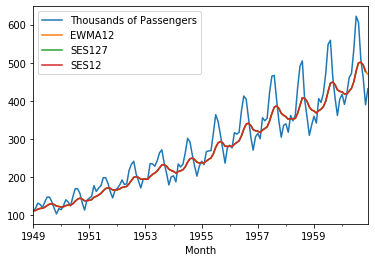

In [74]:
df.plot()

In [76]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [77]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES127', 'SES12', 'DES_add_12'], dtype='object')

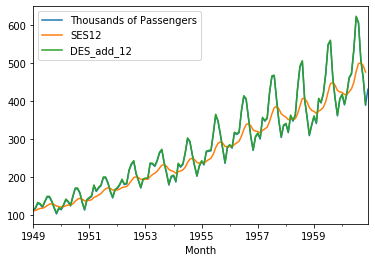

In [78]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].plot()

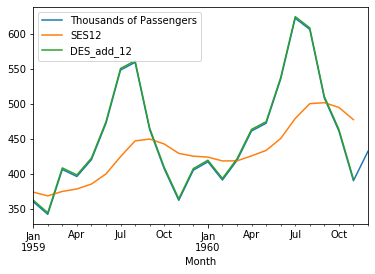

In [80]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[-24:].plot()

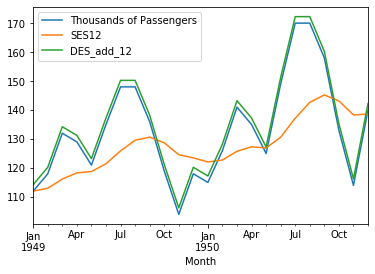

In [81]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot()

In [83]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

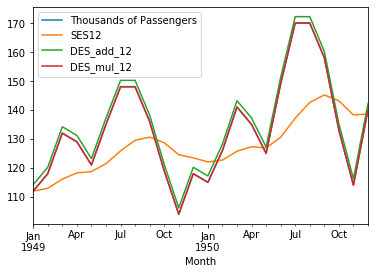

In [84]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[:24].plot()

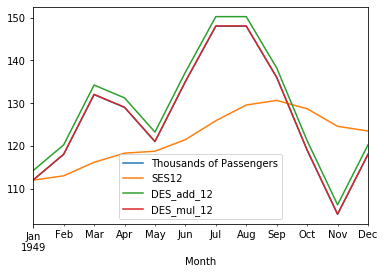

In [85]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[:12].plot()

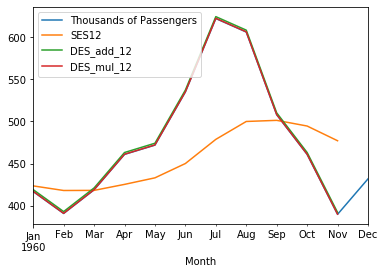

In [87]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[-12:].plot()

In [89]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

In [90]:
df['TES_mul_12']

Month
1949-01-01    111.550641
1949-02-01    118.892977
1949-03-01    133.499357
1949-04-01    128.056470
1949-05-01    121.188532
                 ...    
1960-08-01    629.147444
1960-09-01    511.805498
1960-10-01    447.887995
1960-11-01    397.159276
1960-12-01    437.083692
Freq: MS, Name: TES_mul_12, Length: 144, dtype: float64

In [93]:
%matplotlib qt

In [94]:
df[['Thousands of Passengers', 'TES_mul_12', 'DES_mul_12']].iloc[-24:].plot()